<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href=
                                                   

## Описание проекта
Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. 

# Описание тарифов
Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

## Изучение данных из полученных файлов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv', sep=',')
df_internet = pd.read_csv('/datasets/internet.csv', sep=',')
df_messages = pd.read_csv('/datasets/messages.csv', sep=',')
df_tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
df_users = pd.read_csv('/datasets/users.csv', sep=',')

Напишим функцию для отображения информации о файле

In [3]:
def table_look(table):
    display(table.head())                   # отображение файла
    print()
    print("Информация о файле:", "\n")
    display(table.info())                   # информация о файле
    display(table.describe())               # значения файла
    print("Наименование столбцов:")
    display(table.columns)                  # наименование столбцов
    print()
    print("Количество дубликатов:")
    display(table.duplicated().sum())       # проверка на наличие индексов

Прочитаем и посмотрим таблицы.

In [4]:
table_look(df_calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



Информация о файле: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Наименование столбцов:


Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')


Количество дубликатов:


0

В файле 4 столбца по 202697 строк. Есть звонки длительностью 0 секунд. Наименование столбцов правильное.
Необходимо изменить тип столбцов id и call_date, также необходимо округлить столбец со значениями длительности звонка до целых минут в большую сторону, а также изменить его тип на целый.

Посмотрели на выпадающие значения, все хорошо. Максимальная длительность звонка 38 минут, средняя 7 минут

In [5]:
table_look(df_messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Информация о файле: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Наименование столбцов:


Index(['id', 'message_date', 'user_id'], dtype='object')


Количество дубликатов:


0

Посмотрели на выпадающие значения, все хорошо.

Видим в df_messages 123036 записи и 3 столбца, что наименование столбцов правильное. Необходимо изменить тип столбцов id и message_date. 

In [6]:
table_look(df_internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



Информация о файле: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Наименование столбцов:


Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')


Количество дубликатов:


0

Видим в df_internet 149396 записи и 5 столбцов, что наименование столбцов правильное. Необходимо изменить тип столбцов id и session_date, а также округлить значения мегабайт в большую сторону.

In [7]:
table_look(df_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Информация о файле: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Наименование столбцов:


Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')


Количество дубликатов:


0

Видим в df_tariffs 2 записи и 8 столбцов, что наименование столбцов правильное. 

In [8]:
table_look(df_users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



Информация о файле: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Наименование столбцов:


Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')


Количество дубликатов:


0

Видим средний возраст в 46.5 лет, максимальный в 75 лет

Проверяем на наличие дубликатов. Дубликатов нет.

Видим в df_users 500 записей и 8 столбцов, что наименование столбцов правильное. Необходимо изменить тип столбцов churn_date, reg_date. 

По этому файлу можем сделать вывод, что перед нами выгрузка по 500-м клиентам оператора из разных городов, в том числе и 38, которые тарифом уже не пользуются.

### Вывод по изучению полученных файлов.
    
Перед нами выгрузка на 500 клиентов сотового оператора. Для дальнейшего решения поставленных задач необходимо привести предобработку данных.
Посмотрели и увидели во всех датасетах есть столбец user-id, по описанию проекта - уникальный идентификатор пользователя, по этому столбцу будем связывать таблицы для удобства работы. 
Название всех столбцов правильное.
Необходимо будем изменить тип столбцов на подходящий.

## Предобработка данных

### Df_calls - устраним найденные ранее замечания

Необходимо изменить тип столбцов id и call_date, также необходимо округлить столбец со значениями длительности звонка до целых минут в большую сторону, а также изменить его тип на целый 

In [9]:
#df_calls['id']=df_calls['id'].astype('int64')                      # заменяем тип данных на целый в столбце 
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])       # изменим тип данных на дату
df_calls['month'] = df_calls['call_date'].dt.month                  # добавим столбец с месяцем
df_calls['duration'] = df_calls['duration'].apply(np.ceil)          # округлим в большую сторону
df_calls['duration']=df_calls['duration'].astype('int64')           # изменяем тип на целый
df_calls.isnull().sum().sort_values(ascending=False)                # проверяем есть ли пустые значения, пустых значений нет

month        0
user_id      0
duration     0
call_date    0
id           0
dtype: int64

In [10]:
display(df_calls.head())  # проверяем что получилось
df_calls.info()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


### Df_internet - устраним найденные ранее замечания

Необходимо изменить тип столбцов id и session_date, а также округлить значения мегабайт в большую сторону.

In [11]:
df_internet['id']=df_internet['id'].astype('int64')                         # изменим тип данных на целый
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])   # изменим тип данных на дату
df_internet['month'] = df_internet['session_date'].dt.month                 # добавим столбец с месяцем
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil)              # округлим в большую сторону
df_internet['mb_used']=df_internet['mb_used'].astype('int64')               # изменяем тип на целый
df_internet.isnull().sum().sort_values(ascending=False)                     # проверяем есть ли пустые значения, пустых значений нет

month           0
user_id         0
session_date    0
mb_used         0
id              0
Unnamed: 0      0
dtype: int64

In [12]:
display(df_internet.head())  # проверяем что получилось
df_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,10000,113,2018-11-25,1000,11
1,1,10001,1053,2018-09-07,1000,9
2,2,10002,1198,2018-06-25,1000,6
3,3,10003,551,2018-08-22,1000,8
4,4,10004,303,2018-09-24,1000,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null int64
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 6.8 MB


### Df_messages - устраним найденные ранее замечания

Необходимо изменить тип столбцов id и message_date.

In [13]:
df_messages['id']=df_messages['id'].astype('int64')                         # изменим тип данных на целый
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])   # изменим тип данных на дату
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.isnull().sum().sort_values(ascending=False)                     # проверяем есть ли пустые значения, пустых значений нет

month           0
user_id         0
message_date    0
id              0
dtype: int64

In [14]:
display(df_messages.head())  # проверяем что получилось
df_messages.info()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.8 MB


### Df_tariffs - замечаний нет

In [15]:
df_tariffs.isnull().sum().sort_values(ascending=False)     # проверяем есть ли пустые значения, пустых значений нет

tariff_name              0
rub_per_minute           0
rub_per_message          0
rub_per_gb               0
rub_monthly_fee          0
minutes_included         0
mb_per_month_included    0
messages_included        0
dtype: int64

### Df_users - устраним найденные ранее замечания

Необходимо изменить тип столбцов churn_date, reg_date.

In [16]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])         # изменим тип данных на дату
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])     # изменим тип данных на дату
df_users.isnull().sum().sort_values(ascending=False)                # проверяем есть ли пустые значения, пустых значений нет
df_internet.info()
display(df_users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null int64
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 6.8 MB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [17]:
print('Количество клиентов на тарифе Smart:', len(df_users.query('tariff == "smart"')))
print('Количество клиентов на тарифе Ultra:', len(df_users.query('tariff == "ultra"')))

Количество клиентов на тарифе Smart: 351
Количество клиентов на тарифе Ultra: 149


In [18]:
df_users['tariff_name'] = df_users["tariff"]
display(df_users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_name
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,ultra


## Объединение таблиц и подсчет для каждого пользователя

### Информация по длительности и количеству звонков

In [19]:
users_tariffs_data = df_users.merge(df_tariffs, left_on='tariff', right_on='tariff_name', how='outer')

In [20]:
display(users_tariffs_data.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_name_x,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name_y
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra,ultra,1000,30720,3000,1950,150,1,1,ultra


In [21]:
calls_users_tariff = df_calls.merge(users_tariffs_data, on='user_id', how='outer') 

In [22]:
display(calls_users_tariff.head())

,id,call_date,duration,user_id,month,age,churn_date,city,first_name,last_name,...,tariff,tariff_name_x,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name_y
0,1000_0,2018-07-25,0.0,1000,7.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000_1,2018-08-17,0.0,1000,8.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000_2,2018-06-11,3.0,1000,6.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000_3,2018-09-21,14.0,1000,9.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000_4,2018-12-15,6.0,1000,12.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,ultra,1000,30720,3000,1950,150,1,1,ultra


In [23]:
calls_month_users = calls_users_tariff.pivot_table(index = ['user_id', 
    "month", "tariff", 'city', 'messages_included', 'mb_per_month_included', 
    'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 
    'rub_per_minute'], values = ['duration'],  aggfunc=['sum', 'count']) 
calls_month_users.columns = ['duration', 'quantity_calls']
display(calls_month_users.head())

duration  \
user_id month tariff city      messages_included mb_per_month_included minutes_included rub_monthly_fee rub_per_gb rub_per_message rub_per_minute             
1000    5.0   ultra  Краснодар 1000              30720                 3000             1950            150        1               1                  159.0   
        6.0   ultra  Краснодар 1000              30720                 3000             1950            150        1               1                  172.0   
        7.0   ultra  Краснодар 1000              30720                 3000             1950            150        1               1                  340.0   
        8.0   ultra  Краснодар 1000              30720                 3000             1950            150        1               1                  408.0   
        9.0   ultra  Краснодар 1000              30720                 3000             1950            150        1               1                  466.0   

                                                                                                                                                   quantity_calls  
user_id month tariff city      messages_included mb_per_month_included minutes_included rub_monthly_fee rub_per_gb rub_per_message rub_per_minute                  
1000    5.0   ultra  Краснодар 1000              30720                 3000             1950            150        1               1                           22  
        6.0   ultra  Краснодар 1000              30720                 3000             1950            150        1               1                           43  
        7.0   ultra  Краснодар 1000              30720                 3000             1950            150        1               1                           47  
        8.0   ultra  Краснодар 1000              30720                 3000             1950            150        1               1                           52  
        9.0   ultra  Краснодар 1000              30720                 3000             1950            150        1               1                           58

### Информация по интернет трафику

In [24]:
internet_users = df_internet.merge(df_users, on='user_id', how='outer')

In [25]:
internet_month_users = internet_users.pivot_table(index=['user_id', 'month', "tariff"], values='mb_used',                         
                       aggfunc={'mb_used': 'sum'})

In [26]:
display(internet_month_users.head())

mb_used
user_id month tariff         
1000    5.0   ultra    2256.0
        6.0   ultra   23257.0
        7.0   ultra   14016.0
        8.0   ultra   14070.0
        9.0   ultra   14581.0

### Информация по количеству сообщений

In [27]:
Messages_users = df_messages.merge(df_users, on='user_id', how='outer')

In [28]:
Messages_users['messages'] = Messages_users['last_name'] +' '+ Messages_users['first_name'] +" "+ "из г. " + Messages_users['city']

In [29]:
display(Messages_users.head())

,id,message_date,user_id,month,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_name,messages
0,10000.0,2018-06-27,1000,6.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,ultra,Верещагин Рафаил из г. Краснодар
1,10001.0,2018-10-08,1000,10.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,ultra,Верещагин Рафаил из г. Краснодар
2,10002.0,2018-08-04,1000,8.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,ultra,Верещагин Рафаил из г. Краснодар
3,10003.0,2018-06-16,1000,6.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,ultra,Верещагин Рафаил из г. Краснодар
4,10004.0,2018-12-05,1000,12.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,ultra,Верещагин Рафаил из г. Краснодар


In [30]:
Messages_month_users = Messages_users.pivot_table(index=['user_id', 'month', "tariff"], values='messages',                     
                       aggfunc={'messages': 'count'})

In [31]:
display(Messages_month_users.head())

messages
user_id month tariff          
1000    5.0   ultra         22
        6.0   ultra         60
        7.0   ultra         75
        8.0   ultra         81
        9.0   ultra         57

### Общая таблица

In [32]:
all_data = pd.merge(calls_month_users, Messages_month_users, how='outer', on = ['user_id', "month",] )

In [33]:
all_data = pd.merge(all_data, internet_month_users, how='outer', on = ['user_id', "month",] )

In [34]:
for user in all_data.index:
    all_data.loc[user, 'tariff'] = df_users.loc[user[0]-1000, 'tariff']     # добавили столбеу с тарифом

In [35]:
display(all_data.head(10))

duration  quantity_calls  messages  mb_used tariff
user_id month                                                    
1000    5.0       159.0            22.0      22.0   2256.0  ultra
        6.0       172.0            43.0      60.0  23257.0  ultra
        7.0       340.0            47.0      75.0  14016.0  ultra
        8.0       408.0            52.0      81.0  14070.0  ultra
        9.0       466.0            58.0      57.0  14581.0  ultra
        10.0      350.0            57.0      73.0  14717.0  ultra
        11.0      338.0            43.0      58.0  14768.0  ultra
        12.0      333.0            46.0      70.0   9827.0  ultra
1001    11.0      430.0            59.0       NaN  18452.0  smart
        12.0      414.0            63.0       NaN  14053.0  smart

Получили таблицу с данными по количеству звонков, их общей продолжительности, объемом использованного трафика и количеством отправленных сообщений по месяцам. 

In [36]:
all_data.info()
pd.DataFrame(all_data.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm') # процентное соотношение пропущенных значений

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5.0) to (1476, 4.0)
Data columns (total 5 columns):
duration          3174 non-null float64
quantity_calls    3174 non-null float64
messages          2717 non-null float64
mb_used           3203 non-null float64
tariff            3214 non-null object
dtypes: float64(4), object(1)
memory usage: 319.4+ KB


,0
messages,15.46
quantity_calls,1.24
duration,1.24
mb_used,0.34
tariff,0


Увидели пропущенные значения в столбцах 'использование трафика', 'отправлено сообщений', количество и длительность звонков. Учитывая, что часта ситуация, когда у клиентов это может быть второй номер для звонков/интернета, и в месте с тем сообщения в данный момент вообще практически не отправляют, заменим значения на 0.

In [37]:
all_data['messages']=all_data['messages'].fillna(value=0)
all_data['mb_used']=all_data['mb_used'].fillna(value=0)
all_data['quantity_calls']=all_data['quantity_calls'].fillna(value=0)
all_data['duration']=all_data['duration'].fillna(value=0)

In [38]:
all_data.info()
pd.DataFrame(all_data.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm') # проверяем

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5.0) to (1476, 4.0)
Data columns (total 5 columns):
duration          3214 non-null float64
quantity_calls    3214 non-null float64
messages          3214 non-null float64
mb_used           3214 non-null float64
tariff            3214 non-null object
dtypes: float64(4), object(1)
memory usage: 319.4+ KB


,0
tariff,0
mb_used,0
messages,0
quantity_calls,0
duration,0


### Посчитаем помесячную выручку с каждого пользователя.

In [39]:
def expenses(row):     
    if row['tariff'] == 'smart':
        
        extra_duration = row['duration'] - df_tariffs.loc[0, 'minutes_included']
        extra_mb = row['mb_used'] - df_tariffs.loc[0, 'mb_per_month_included']
        extra_messages = row['messages'] - df_tariffs.loc[0, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (df_tariffs.loc[0, 'rub_per_message'] * extra_messages + 
                   (df_tariffs.loc[0, 'rub_per_gb'] / 1024) * extra_mb + 
                   df_tariffs.loc[0, 'rub_per_minute'] * extra_duration + 
                   df_tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    
    else:
        extra_duration = row['duration'] - df_tariffs.loc[1, 'minutes_included']
        extra_mb = row['mb_used'] - df_tariffs.loc[1, 'mb_per_month_included']
        extra_messages = row['messages'] - df_tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (df_tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                   (df_tariffs.loc[1, 'rub_per_gb'] / 1024) * extra_mb + 
                   df_tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                   df_tariffs.loc[1, 'rub_monthly_fee']
                  )
all_data['expenses'] = all_data.apply(expenses, axis=1)
all_data['expenses']=all_data['expenses'].astype('int64')
display(all_data.head(10))

duration  quantity_calls  messages  mb_used tariff  expenses
user_id month                                                              
1000    5.0       159.0            22.0      22.0   2256.0  ultra      1950
        6.0       172.0            43.0      60.0  23257.0  ultra      1950
        7.0       340.0            47.0      75.0  14016.0  ultra      1950
        8.0       408.0            52.0      81.0  14070.0  ultra      1950
        9.0       466.0            58.0      57.0  14581.0  ultra      1950
        10.0      350.0            57.0      73.0  14717.0  ultra      1950
        11.0      338.0            43.0      58.0  14768.0  ultra      1950
        12.0      333.0            46.0      70.0   9827.0  ultra      1950
1001    11.0      430.0            59.0       0.0  18452.0  smart      1153
        12.0      414.0            63.0       0.0  14053.0  smart       550

## Анализ данных

###  Медианные значения пользователей

In [40]:
smart = all_data.query('tariff=="smart"')
smart_med = smart.pivot_table(index='user_id',values=['duration', 
    'messages', 'mb_used', 'expenses'], aggfunc='median', margins=True)
display(smart_med.head()) # получили медианные значения пользователей тарифа Smart

,duration,expenses,mb_used,messages
user_id,,,,
1001,422.0,851.5,16252.5,0.0
1002,214.0,987.0,17601.0,11.0
1005,593.5,836.5,7843.0,49.0
1006,356.0,585.0,15543.0,0.0
1007,480.0,843.0,14444.0,26.0


Видим, что на тарифе Smart медианное значение продолжительности разговоров 423 минуты, 16527 Мб трафика, 28 сообщений и 961 руб. затрат в месяц.

In [41]:
ultra = all_data.query('tariff=="ultra"')
ultra_med = ultra.pivot_table(index='user_id', values=['duration',
    'messages', 'mb_used', 'expenses'], aggfunc='median', margins=True)
display(ultra_med.head()) # получили медианные значения пользователей тарифа Smart

,duration,expenses,mb_used,messages
user_id,,,,
1000,339.0,1950.0,14325.5,65.0
1003,824.0,1950.0,11368.0,83.0
1004,132.5,1950.0,17828.5,154.5
1013,468.0,1950.0,15272.5,21.0
1016,61.0,1950.0,13417.0,71.0


Видим, что на тарифе Ultra медианное значение продолжительности разговоров 528 минуты, 19374 Мб трафика, 39 сообщений и 1950 руб. затрат.

### Посчитаем среднее количество, дисперсию и стандартное отклонение.

In [42]:
expenses

ooo = all_data.pivot_table(index=['tariff'], values=['duration', 'mb_used', 'messages', 'expenses'], 
                    aggfunc={'duration': [np.median, np.var, np.std, np.mean], 
                             'mb_used': [np.median, np.var, np.std, np.mean], 
                             'expenses': [np.median, np.var, np.std, np.mean], 
                             'messages': [np.median, np.var, np.std, np.mean]})
ooo

duration                                       expenses          \
              mean median         std            var         mean  median   
tariff                                                                      
smart   417.934948  422.0  190.313730   36219.315784  1233.057873   959.0   
ultra   526.623350  518.0  317.606098  100873.633397  2060.462944  1950.0   

                                        mb_used                         \
               std            var          mean   median           std   
tariff                                                                   
smart   787.544032  620225.603023  16229.188425  16531.0   5877.576978   
ultra   356.187378  126869.448067  19486.901523  19324.0  10096.317202   

                       messages                                 
                 var       mean median        std          var  
tariff                                                          
smart   3.454591e+07  33.384029   28.0  28.227876   796.812958  
ultra   1.019356e+08  49.363452   38.0  47.804457  2285.266143

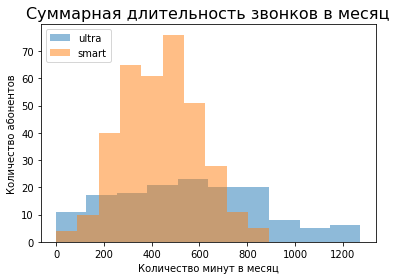

In [43]:
plt.hist(ultra_med['duration'], alpha = 0.5, label='ultra')
plt.hist(smart_med['duration'], alpha = 0.5, label='smart')
plt.title('Суммарная длительность звонков в месяц', size=16)
plt.xlabel('Количество минут в месяц')
plt.ylabel('Количество абонентов')
plt.legend(loc='upper left')

plt.show()

На обоих графиках видим нормальное распределение. Видим пики в районе 420 (Smart) и 530 минут (Ultra).

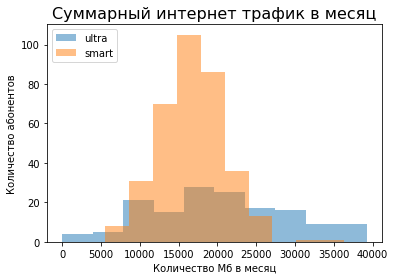

In [44]:
plt.hist(ultra_med['mb_used'], alpha = 0.5, label='ultra')
plt.hist(smart_med['mb_used'], alpha = 0.5, label='smart')
plt.title('Суммарный интернет трафик в месяц', size=16)
plt.xlabel('Количество Мб в месяц')
plt.ylabel('Количество абонентов')
plt.legend(loc='upper left')

plt.show()

Абоненты тарифа Ultra тратят больше интернет трафика. Видим пики в 16 (Smart) и 19 Гб (Ultra).

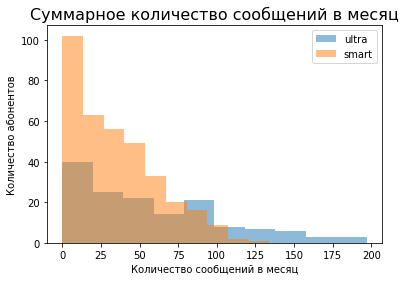

In [45]:
plt.hist(ultra_med['messages'], alpha = 0.5, label='ultra')
plt.hist(smart_med['messages'], alpha = 0.5, label='smart')
plt.title('Суммарное количество сообщений в месяц', size=16)
plt.xlabel('Количество сообщений в месяц')
plt.ylabel('Количество абонентов')
plt.legend(loc='upper right')

plt.show()

Видим на гистограмме распределение Пуассона, а также, что абоненты тарифа Ultra больше отправляют сообщений.

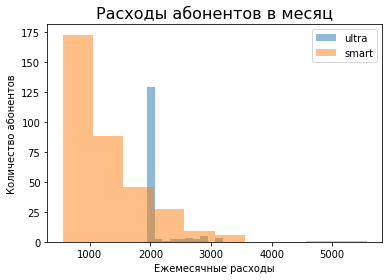

In [46]:
plt.hist(ultra_med['expenses'], alpha = 0.5, label='ultra')
plt.hist(smart_med['expenses'], alpha = 0.5, label='smart')
plt.title('Расходы абонентов в месяц', size=16)
plt.xlabel('Ежемесячные расходы')
plt.ylabel('Количество абонентов')
plt.legend(loc='upper right')

plt.show()

По графику видим, что клиенты на тарифе Ultra более правильно подходят к подбору тарифа - видим четкий пик в районе стоимости тарифного плана. Клиентов тарифа Smart с расходами от 1500 до 1900 рублей можно перетянуть на тариф с абонентской платой 1950 руб (абонентская плата тарифа Ultra). 

## Проверка гипотез

### Различие в средней выручке тарифов

Примем нулевой гипотезу о том, что средняя выручка не различается. Альтернативная гипотеза о том, что выручки по тарифам различаются.

In [47]:
alpha = 0.05  # Показатель точности будет 95%, этого достаточно в этом случае.

results = st.ttest_ind(ultra_med['expenses'],smart_med['expenses']) # у нас два разных датасета, поэтому способ такой

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.669908941355437e-36
Отвергаем нулевую гипотезу


Выручка в тарифах различается.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [48]:
for user in all_data.index:
    all_data.loc[user, 'city'] = df_users.loc[user[0]-1000, 'city']   # добавили столбец с городом

In [49]:
moscow = all_data.query('city=="Москва"')        # выделили Москву
no_moscow = all_data.query('city!="Москва"')     # выделили регионы

In [50]:
moscow_mean = moscow.pivot_table(index='user_id', values=['expenses'], aggfunc='mean', margins=True)   # нашли среднее в Москве
no_moscow_mean = no_moscow.pivot_table(index='user_id', values=['expenses'], aggfunc='mean', margins=True)   # нашли среднее в регионах

Нулевая гипотеза о том, что выручка в Москве равна выручке в регионах.

In [51]:
alpha = 0.05  # Показатель точности будет 95%, этого достаточно в этом случае.

results = st.ttest_ind(moscow_mean['expenses'],no_moscow_mean['expenses']) # у нас два разных датасета, поэтому способ такой

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.402900360691239
Не получилось отвергнуть нулевую гипотезу


Средняя выручка в Москве не отличается от выручки по регионам.

## Общий вывод

Провели анализ тарифов на выборке клиентов. 
В нашем распоряжении были данные 500 пользователей «Мегалайна».
Выяснили, что более доходными абонентами для компании являются абоненты с тарифом Ultra. 
Просчитали, что средняя выручка в Москве не отличается от выручки в регионах.

Увидели каким абонентам можно предложить перейти на другой план с целью увеличения дохода компании и более свободного общения для клиентов компании.

In [52]:
print('Средняя итоговая абонентская плата на тарифе Ultra:', ultra_med['expenses'].describe()['mean'].astype('int64'), "руб/мес.")
print('Средняя итоговая абонентская плата на тарифе Smart:', smart_med['expenses'].describe()['mean'].astype('int64'), "руб/мес.")
print()
print('Среднее количесвто минут разговора на тарифе Ultra:', ultra_med['duration'].describe()['mean'].astype('int64'), 'мин')
print('Среднее количесвто минут разговора на тарифе Smart:', smart_med['duration'].describe()['mean'].astype('int64'), 'мин')
print()
print('Средний интернет трафика на тарифе Ultra:', (ultra_med['mb_used'].describe()['mean']/1024).astype('int64'), 'Гб')
print('Средний интернет трафика на тарифе Smart:', (smart_med['mb_used'].describe()['mean']/1024).astype('int64'), 'Гб')
print()
print('Среднее количество сообщений на тарифе Ultra:', ultra_med['messages'].describe()['mean'].astype('int64'), "шт")
print('Среднее количество сообщений на тарифе Smart:', smart_med['messages'].describe()['mean'].astype('int64'), "шт")

Средняя итоговая абонентская плата на тарифе Ultra: 2049 руб/мес.
Средняя итоговая абонентская плата на тарифе Smart: 1239 руб/мес.

Среднее количесвто минут разговора на тарифе Ultra: 557 мин
Среднее количесвто минут разговора на тарифе Smart: 437 мин

Средний интернет трафика на тарифе Ultra: 19 Гб
Средний интернет трафика на тарифе Smart: 16 Гб

Среднее количество сообщений на тарифе Ultra: 56 шт
Среднее количество сообщений на тарифе Smart: 33 шт


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [X]  открыт файл
- [X]  файлы изучены (выведены первые строки, метод info())
- [X]  определены пропущенные значения
- [X]  заполнены пропущенные значения
- [X]  есть пояснение, какие пропущенные значения обнаружены
- [X]  изменены типы данных
- [X]  есть пояснение, в каких столбцах изменены типы и почему

Посчитайте для каждого пользователя:

- [X]  количество сделанных звонков и израсходованных минут разговора по месяцам;
- [X]  количество отправленных сообщений по месяцам;
- [X]  объем израсходованного интернет-трафика по месяцам;
- [X]  помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Проанализируйте данные:
- [X]  Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- [X] Посчитайте среднее количество, дисперсию и стандартное отклонение. 
- [X] Постройте гистограммы. 
- [X] Опишите распределения.

Проверьте гипотезы:
- [X]  средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- [X]  средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Поясните:
- [X]  как вы формулировали нулевую и альтернативную гипотезы;
- [X]  какой критерий использовали для проверки гипотез и почему.
